In [1]:
!pip install datasets

DEPRECATION: Loading egg at /opt/homebrew/lib/python3.11/site-packages/dnspython-2.1.1.dev472+g8231eaa-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
import pandas as pd
from datasets import load_dataset

# Load dataset
dataset = load_dataset("Deysi/sentences-and-emotions")
df = pd.DataFrame(dataset['train'])

# Display the first few rows of the dataset
df.head()


,utterance,emotion
0,The blake's got divorced .,neutral
1,Really ? Why ?,neutral
2,Mr . black has been getting a little around as...,neutral
3,I'm surprised . He does't look like a guy who'...,surprise
4,"No , he doesn't . But his wife found out he ha...",neutral


In [3]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# Tokenize and preprocess sentences
sentences = df['utterance'].apply(simple_preprocess).tolist()

# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


In [4]:
import numpy as np

def sentence_to_vector(sentence, model):
    words = simple_preprocess(sentence)
    vectors = [model.wv[word] for word in words if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

# Convert all sentences to vectors
X = np.array([sentence_to_vector(sentence, word2vec_model) for sentence in df['utterance']])


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define number of clusters (you can adjust this)
n_clusters = 5

# Initialize KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit KMeans model
kmeans.fit(X)

# Assign each sentence to a cluster
df['cluster'] = kmeans.labels_

# Print the first few sentences with their assigned cluster
print(df[['utterance', 'cluster']].head())

# Compute silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.4f}")


                                           utterance  cluster
0                         The blake's got divorced .        4
1                                     Really ? Why ?        4
2  Mr . black has been getting a little around as...        0
3  I'm surprised . He does't look like a guy who'...        0
4  No , he doesn't . But his wife found out he ha...        0
Silhouette Score: 0.5133


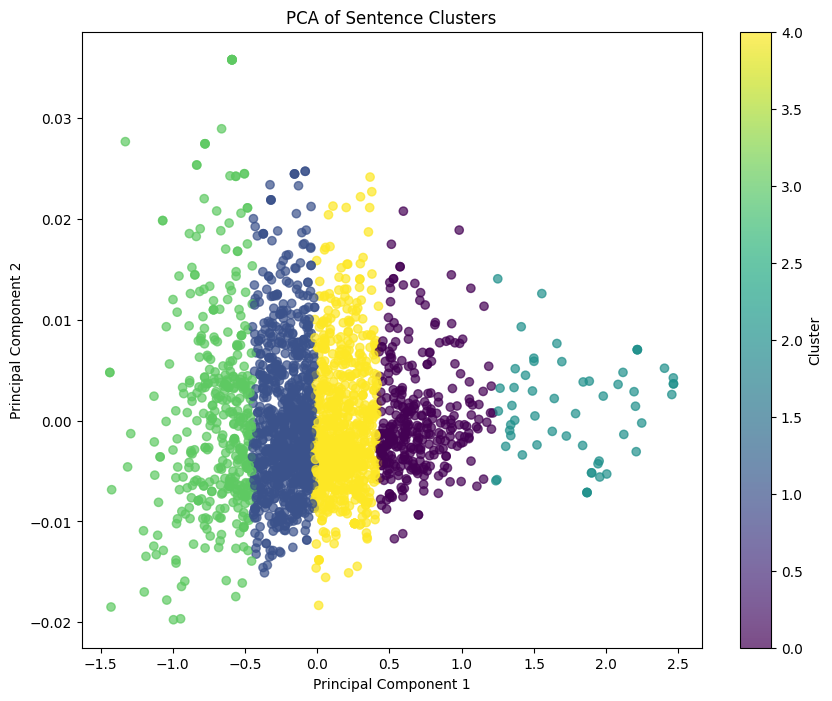

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title('PCA of Sentence Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [8]:
import pandas as pd

# Load the dataset
file_path = 'train.txt'

# Read the file into a DataFrame
df = pd.read_csv(file_path, delimiter=';', names=['sentence', 'emotion'])

# Display the first few rows to verify the structure
print(df.head())

# Count the number of sentences for each label
label_counts = df['emotion'].value_counts()

# Print the counts
print("Number of sentences for each label:")
print(label_counts)

                                            sentence  emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger
Number of sentences for each label:
emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64


In [19]:
import pandas as pd

# Load the dataset
file_path = 'train.txt'

# Read the file into a DataFrame
df = pd.read_csv(file_path, delimiter=';', names=['sentence', 'emotion'])

# Display the first few rows to verify the structure
print(df.head())

# Count the number of sentences for each label
label_counts = df['emotion'].value_counts()

# Print the counts
print("Number of sentences for each label:")
print(label_counts)

# Sample 500 sentences from each label
# Ensure that there are at least 500 samples per label
df_sampled = df.groupby('emotion').apply(lambda x: x.sample(n=min(len(x), 500), random_state=42)).reset_index(drop=True)

# Display the number of sentences per label in the sampled DataFrame
sampled_label_counts = df_sampled['emotion'].value_counts()
print("Number of sentences per label in the sampled dataset:")
print(sampled_label_counts)

# Save the sampled DataFrame to a CSV file
df_sampled.to_csv('sampled_data.csv', index=False)

print("Sampled data saved to 'sampled_data.csv'")


                                            sentence  emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger
Number of sentences for each label:
emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64
Number of sentences per label in the sampled dataset:
emotion
anger       500
fear        500
joy         500
love        500
sadness     500
surprise    500
Name: count, dtype: int64
Sampled data saved to 'sampled_data.csv'


/var/folders/d2/6pb_00b166x9w9qj_wq1khnw0000gn/T/ipykernel_2909/2418399254.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby('emotion').apply(lambda x: x.sample(n=min(len(x), 500), random_state=42)).reset_index(drop=True)


In [20]:
import pandas as pd

# Load the sampled CSV file
sampled_df = pd.read_csv('sampled_data.csv')

# Display the first few rows to verify the structure
print(sampled_df.head())

# Count the number of sentences for each label
sampled_label_counts = sampled_df['emotion'].value_counts()

# Print the counts
print("Number of sentences for each label in the sampled CSV file:")
print(sampled_label_counts)

# Ensure that each label has exactly 500 sentences
assert all(count == 500 for count in sampled_label_counts), "Not all labels have 500 sentences."
print("Verification complete: Each label has 500 sentences.")

                                            sentence emotion
0  i ve been feeling a bit cranky with the kids t...   anger
1  i feel frustrated sometimes with my mac lipsti...   anger
2                                 i feeling stressed   anger
3                   im feeling less annoyed with him   anger
4  i feel more irritable and i feel more sensible...   anger
Number of sentences for each label in the sampled CSV file:
emotion
anger       500
fear        500
joy         500
love        500
sadness     500
surprise    500
Name: count, dtype: int64
Verification complete: Each label has 500 sentences.


this is the logistic reg !!!


In [43]:
import pandas as pd
import numpy as np
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize

# Ensure required NLTK data is downloaded
nltk.download('stopwords')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Function to calculate additional features
def calculate_text_features(text):
    # Word Count
    word_count = len(text.split())
    # Average Word Length
    words = text.split()
    avg_word_length = sum(len(word) for word in words) / word_count if word_count > 0 else 0
    # Punctuation Count
    punctuation_count = sum(1 for char in text if char in string.punctuation)
    # Stopword Count
    stopword_count = sum(1 for word in words if word.lower() in stop_words)
    # Digit Count
    digit_count = sum(1 for char in text if char.isdigit())
    # POS Tagging
    pos_tags = pos_tag(word_tokenize(text))
    noun_count = sum(1 for word, tag in pos_tags if tag.startswith('NN'))
    # Exclamation Count
    exclamation_count = text.count('!')
    # Question Count
    question_count = text.count('?')
    # Title Word Count
    title_word_count = sum(1 for word in words if word.istitle())
    
    return (word_count, avg_word_length, punctuation_count, stopword_count, digit_count, noun_count,
            exclamation_count, question_count, title_word_count)

# Load dataset
df = pd.read_csv('sampled_data.csv', header=None, names=['text', 'label'], delimiter=',', quoting=3)

# Split data into features and labels
X = df['text']
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert text data to numerical data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Calculate additional features for training data
X_train_features = np.array([calculate_text_features(text) for text in X_train])
# Calculate additional features for testing data
X_test_features = np.array([calculate_text_features(text) for text in X_test])

# Combine CountVectorizer output with additional features
X_train_combined = hstack([X_train_vect, X_train_features])
X_test_combined = hstack([X_test_vect, X_test_features])

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_combined, y_train)

# Predict on the test set
y_pred = model.predict(X_test_combined)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Test the model with new examples
new_examples = [
    "I am so excited about the upcoming vacation!",
    "I feel completely overwhelmed with work right now.",
    "The kids are really making me angry today."
]

# Convert new examples to numerical data using the same vectorizer
new_examples_vect = vectorizer.transform(new_examples)

# Calculate additional features for new examples
new_examples_features = np.array([calculate_text_features(text) for text in new_examples])

# Combine CountVectorizer output with additional features for new examples
new_examples_combined = hstack([new_examples_vect, new_examples_features])

# Predict emotions for the new examples
predictions = model.predict(new_examples_combined)

# Output predictions
for example, prediction in zip(new_examples, predictions):
    print(f"Text: {example}")
    print(f"Predicted Emotion: {prediction}")
    print()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zohar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.7522222222222222
Classification Report:
              precision    recall  f1-score   support

       anger       0.85      0.69      0.76       162
        fear       0.72      0.68      0.70       151
         joy       0.65      0.72      0.68       148
        love       0.81      0.79      0.80       143
     sadness       0.67      0.71      0.69       141
    surprise       0.83      0.92      0.87       155

    accuracy                           0.75       900
   macro avg       0.75      0.75      0.75       900
weighted avg       0.76      0.75      0.75       900

Text: I am so excited about the upcoming vacation!
Predicted Emotion: joy

Text: I feel completely overwhelmed with work right now.
Predicted Emotion: surprise

Text: The kids are really making me angry today.
Predicted Emotion: anger



c:\Users\zohar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
